In [2]:
import pandas as pd

# Load the datasets
genuine_data = pd.read_csv('genuine_with_label.csv')
malicious_data = pd.read_csv('malicious_with_label_spoofed.csv')

# Display the first few rows of each dataset
print("Genuine Data:")
print(genuine_data.head())
print("\nMalicious Data:")
print(malicious_data.head())

Genuine Data:
   Duration  Received echo requests  label
0  0.000020                       1      0
1  1.000660                       2      0
2  2.003343                       3      0
3  3.004835                       4      0
4  4.008014                       5      0

Malicious Data:
   Duration  Received echo requests  Attack
0   266.938                  288725       1
1   378.741                  408071       1
2   217.263                  237209       1
3   392.547                  446280       1
4   170.699                  199199       1


In [3]:
# Combine the datasets
genuine_data['Attack'] = 0  # Label genuine data as 0
malicious_data['Attack'] = 1  # Label malicious data as 1
combined_data = pd.concat([genuine_data, malicious_data]).reset_index(drop=True)

# Check for NaN values
print("Missing values in combined data:\n", combined_data.isna().sum())

# Drop rows with NaN values
combined_data = combined_data.dropna()

# Display the combined dataset
print("Combined Data:")
print(combined_data.head())


Missing values in combined data:
 Duration                    0
Received echo requests      0
label                     500
Attack                      0
dtype: int64
Combined Data:
   Duration  Received echo requests  label  Attack
0  0.000020                       1    0.0       0
1  1.000660                       2    0.0       0
2  2.003343                       3    0.0       0
3  3.004835                       4    0.0       0
4  4.008014                       5    0.0       0


In [4]:
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = combined_data.drop(['Attack'], axis=1)
y = combined_data['Attack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=177, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 350
Testing set size: 150


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaled Training Data:")
print(X_train[:5])


Scaled Training Data:
[[0.11048426 0.11044177 0.        ]
 [0.85373334 0.85341365 0.        ]
 [0.1185353  0.1184739  0.        ]
 [0.00602835 0.0060241  0.        ]
 [0.74672947 0.74698795 0.        ]]


First few rows of the dataset:
   Duration  Received echo requests  label
0  0.000020                       1      0
1  1.000660                       2      0
2  2.003343                       3      0
3  3.004835                       4      0
4  4.008014                       5      0

Basic statistics of the dataset:
         Duration  Received echo requests  label
count  500.000000              500.000000  500.0
mean   249.791921              250.500000    0.0
std    144.644530              144.481833    0.0
min      0.000020                1.000000    0.0
25%    124.908863              125.750000    0.0
50%    249.816753              250.500000    0.0
75%    374.556671              375.250000    0.0
max    499.635215              500.000000    0.0

Missing values in each column:
Duration                  0
Received echo requests    0
label                     0
dtype: int64


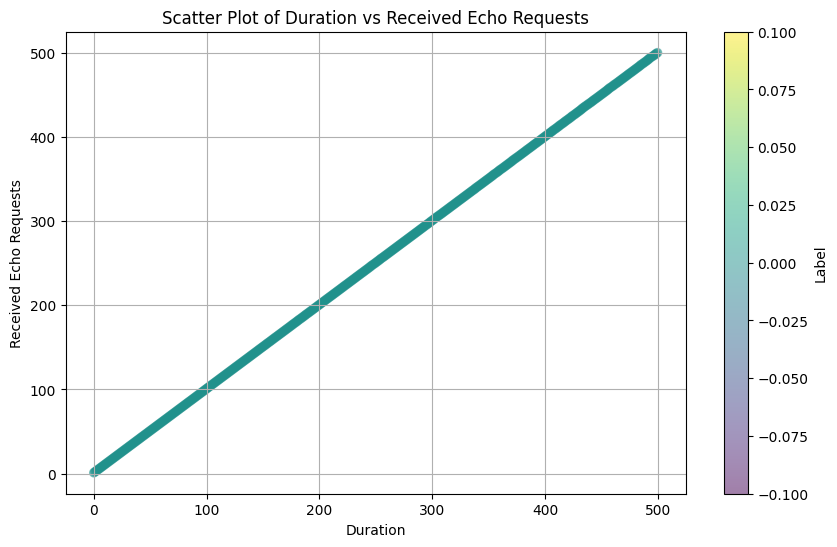

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'genuine_with_label.csv'  # Ensure this path is correct
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(data['Duration'], data['Received echo requests'], c=data['label'], cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Duration vs Received Echo Requests')
plt.xlabel('Duration')
plt.ylabel('Received Echo Requests')
plt.colorbar(label='Label')
plt.grid()
plt.show()

In [9]:
pip install dash pandas matplotlib

     |████████████████████████████████| 7.5 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 19.1 MB 104 kB/s  eta 0:00:01    |█████▌                          | 3.3 MB 34.6 MB/s eta 0:00:01     |███████████                     | 6.5 MB 34.6 MB/s eta 0:00:01     |█████████████████████████       | 14.9 MB 34.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
